In [3]:
from ipywidgets import *
import numpy.random as rd
from math import *
import matplotlib.pyplot as plt

# Pile ou Face

On va écrire un programme qui affiche un nombre $n$ de Pile ou Face

In [10]:
n=200
for i in range(n):
    if rd.random()<0.5:
        print('P', end=" ")
    else:
        print('F',end=" ")

F P F F P F F F F F P F F P F P F P F F P P P F P P P F P P P P F F P F P F F P F F P F P F P F P F P F F P P F F F P F F F P F P F P F F P F P P P P P F P P F F P P F F P F F F P P F F P F P P F F F F P P P P F P P P F P P P P P P F F F P P F F P P P F F P F F F F P P P F P F P F F F F P P P P P P P F P P P F P P P F P P F P F F P F F P F F P F F P F F P P P P F F P F P F P F F F P P P P P P P F 

## Longue suite de résultats égaux consécutifs

In [6]:
def PileFace(n):
    L=[]
    for i in range(n):
        if rd.random()<0.5:
            L.append('P')
        else:
            L.append('F')
    return L

In [29]:
def Record(Liste):
    l=1
    debut=0
    rec=1
    x=Liste[0]
    for i in range(1,len(Liste)):
        y=Liste[i]
        if y==x:
            l=l+1
        else:
            l=1
        if l>rec:
            rec=l
            debut=i-rec+1
        x=y
    return debut,rec

In [44]:
n=200
Liste=PileFace(n)
indice,record=Record(Liste)
for i in range(indice):
    print(Liste[i],end=" ")
for i in range(indice,indice+record):
    print('\033[1m' +"\033[1;31m"  + Liste[i] + "\033[0;0m", end=" ")
for i in range(indice+record,len(Liste)):
    print(Liste[i],end=" ")

print()
print("Il y a une suite de ",end="")
print(record,end="")
print(" résultats égaux consécutifs, qui commence à l'indice ", end="")
print(indice)

F P P P P P F P P P P F P F P F F P P F P P P P F P F F P P F F F F P P F F F P P P F F P F P F P P F F F F F P F P P P F F P F P F F P P F P P F F P F F F F P P P P F F F F P P P P P P P P P P P P F F F F F F P P P P P F F F P F F P P P P P P P P P P F P P F P F P P F F F F P P F F F F F F F F F P F P F P F P F P F P P F P F P P F F F P F F F P F F P P F P F P P F F F P F P P F P P F P P P P F F 
Il y a une suite de 12 résultats égaux consécutifs, qui commence à l'indice 87


### Si on ne s'intéresse qu'à la longueur...

On peut aller plus vite.

In [13]:
def Longueur(n):
    l=1
    rec=1
    for i in range(1,n):
        if rd.random()<0.5:
            l=l+1
        else:
            l=1
        if l>rec:
            rec=l
    return rec

In [14]:
k=10000
l=15
Proba=[0 for i in range(l)]
n=100
for i in range(k):
    j=Longueur(n)
    if j<l+1:
        Proba[j-1] +=1/k

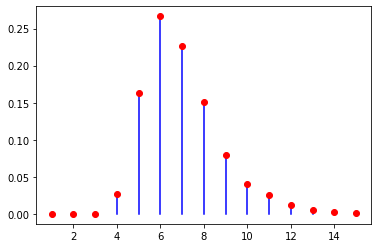

In [15]:
for i in range(l):
    plt.plot([i+1,i+1],[0,Proba[i]],color='blue')
    plt.plot(i+1,Proba[i],'o',color='red')
plt.show()

In [26]:
def Superieur(k):
    return 1-sum(Proba[:k])
interact(Superieur,k=(0,l,1))

interactive(children=(IntSlider(value=7, description='k', max=15), Output()), _dom_classes=('widget-interact',…

<function __main__.Superieur(k)>